## Credit  Scoring Model



This task trains and compared Logistic Regression,Decision Tree And random Forest Classifier on a credit card dataset to predict the likelihood of default.Evaluation is performed using classification metrics.

In [40]:
#Importing necessary library for loading the dataset
import pandas as pd


In [41]:
#Loading the dataset
df =pd.read_csv('Credit_Card_default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:
#Checking whether any null values or missing values exist in the dataset or not
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [43]:
#finding zeros in the columns
(df==0).sum()

ID                                0
LIMIT_BAL                         0
SEX                               0
EDUCATION                        14
MARRIAGE                         54
AGE                               0
PAY_0                         14737
PAY_2                         15730
PAY_3                         15764
PAY_4                         16455
PAY_5                         16947
PAY_6                         16286
BILL_AMT1                      2008
BILL_AMT2                      2506
BILL_AMT3                      2870
BILL_AMT4                      3195
BILL_AMT5                      3506
BILL_AMT6                      4020
PAY_AMT1                       5249
PAY_AMT2                       5396
PAY_AMT3                       5968
PAY_AMT4                       6408
PAY_AMT5                       6703
PAY_AMT6                       7173
default payment next month    23364
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [45]:
#Replacing unknown categories in MARRIAGE and EDUCATION
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3)
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6],4)

In [46]:
df.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [47]:
#Ensuring the data is cleaned as expected
(df==0).sum()

ID                                0
LIMIT_BAL                         0
SEX                               0
EDUCATION                         0
MARRIAGE                          0
AGE                               0
PAY_0                         14737
PAY_2                         15730
PAY_3                         15764
PAY_4                         16455
PAY_5                         16947
PAY_6                         16286
BILL_AMT1                      2008
BILL_AMT2                      2506
BILL_AMT3                      2870
BILL_AMT4                      3195
BILL_AMT5                      3506
BILL_AMT6                      4020
PAY_AMT1                       5249
PAY_AMT2                       5396
PAY_AMT3                       5968
PAY_AMT4                       6408
PAY_AMT5                       6703
PAY_AMT6                       7173
default payment next month    23364
dtype: int64

In [48]:
#Renaming the target col
df.rename(columns={'default payment next month':'DEFAULT'},inplace=True)

In [49]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [50]:
#Feature and Target Selection
X = df.drop(columns=['ID','DEFAULT'],axis =1)
y = df['DEFAULT']

In [51]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [52]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT, Length: 30000, dtype: int64

In [53]:
#Splitting the dataset based on 8:2 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [54]:
print(f"X_train.shape:{X_train.shape}\nX_test.shape:{X_test.shape}\ny_train.shape:{y_train.shape}\ny_test.shape:{y_test.shape}")

X_train.shape:(24000, 23)
X_test.shape:(6000, 23)
y_train.shape:(24000,)
y_test.shape:(6000,)


In [55]:
#Scaling the dataset
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[('num',StandardScaler(),X.columns)])

In [56]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object'))])

In [57]:
X_train_scaled =preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [58]:
type(X_train_scaled)

numpy.ndarray

In [59]:
y.value_counts(normalize=True)

DEFAULT
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [60]:
#Training the model based on Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(class_weight='balanced',max_iter=1000)
lg

LogisticRegression(class_weight='balanced', max_iter=1000)

In [61]:
#Initializing the model
lg.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [62]:
#Making predictions using test data
y_pred = lg.predict(X_test_scaled)
y_prob = lg.predict_proba(X_test_scaled)[:,1]

In [63]:
#Evaluating the performance using classification metrics
from sklearn.metrics import confusion_matrix, roc_curve

print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")


Confusion Matrix:
[[3317 1370]
 [ 467  846]]


In [64]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,classification_report,roc_curve
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"F1 Score:{f1_score(y_test,y_pred)}")
print(f"ROC AUC Score:{roc_auc_score(y_test,y_prob)}")
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")

Accuracy:0.6938333333333333
F1 Score:0.47945593652592805
ROC AUC Score:0.727715703739549
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      4687
           1       0.38      0.64      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.72      6000



In [65]:
roc_auc = roc_auc_score(y_test,y_prob)
fpr,tpr,_ = roc_curve(y_test,y_prob)

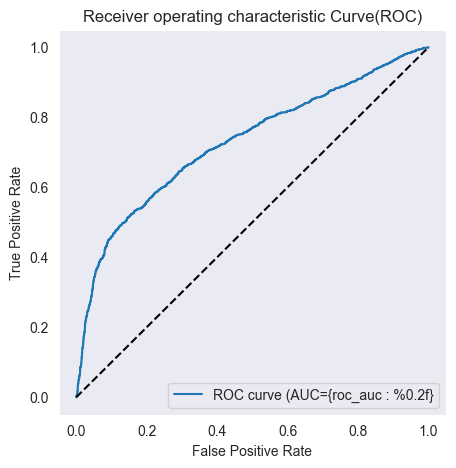

In [66]:
#Plotting the ROC curve for Logistic Regression
import  matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,label='ROC curve (AUC={roc_auc : %0.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [67]:
#Model2: DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [68]:
#predicting the data using test data
y_pred_dt = dt.predict(X_test_scaled)
y_pred_dt_prob = dt.predict_proba(X_test_scaled)[:,1]

In [69]:
#Evaluating the model's performance using classification metrics
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score,roc_auc_score
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred_dt)}")
print(f"Classification Report:\n{classification_report(y_test,y_pred_dt)}")
print(f"F1 Score:{f1_score(y_test,y_pred_dt)}")
print(f"Accuracy:{accuracy_score(y_test,y_pred_dt)}")
print(f"ROC AUC Score:{roc_auc_score(y_test,y_pred_dt_prob)}")

Confusion Matrix:
[[3814  873]
 [ 772  541]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.40      1313

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000

F1 Score:0.3967730106343968
Accuracy:0.7258333333333333
ROC AUC Score:0.6136282868903324


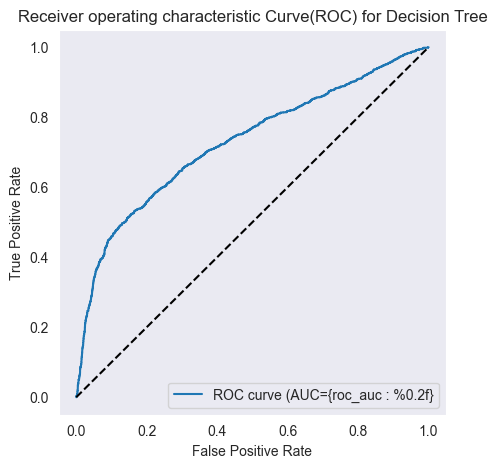

In [70]:
#Plotting the ROC curve for Decision Tree Classifier
import  matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,label='ROC curve (AUC={roc_auc : %0.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve(ROC) for Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [71]:
#Model3:using the random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,class_weight='balanced',random_state=42
)
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [72]:
y_pred_rf = rf.predict(X_test_scaled)

In [73]:
y_proba_rf = rf.predict_proba(X_test_scaled)[:,1]

In [74]:
#Evaluating the model3's performance using classification metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,roc_auc_score
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test,y_pred_rf)}")
print(f"Accuracy Score:{accuracy_score(y_test,y_pred_rf)}")
print(f"F1 Score:{f1_score(y_test,y_pred_rf)}")
print(f"ROC AUC Score:{roc_auc_score(y_test,y_proba_rf)}")

Confusion Matrix:
[[4441  246]
 [ 871  442]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.64      0.34      0.44      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.67      6000
weighted avg       0.79      0.81      0.79      6000

Accuracy Score:0.8138333333333333
F1 Score:0.44177911044477763
ROC AUC Score:0.7632894601928395


In [75]:
roc_auc_rf = roc_auc_score(y_test,y_proba_rf)
fpr,tpr,_ = roc_curve(y_test,y_proba_rf)

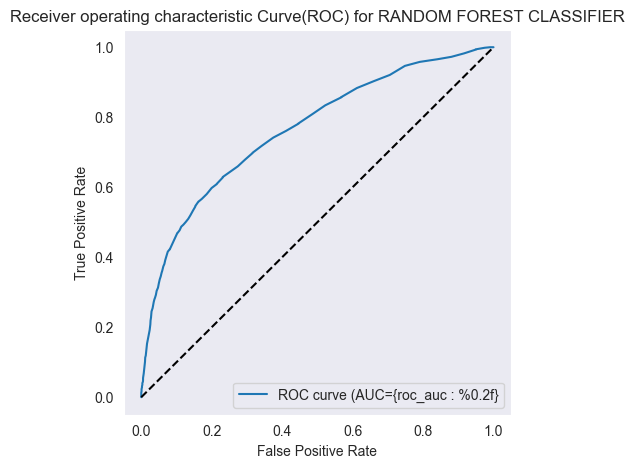

In [76]:
#Plotting the ROC curve for model3
import  matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,label='ROC curve (AUC={roc_auc : %0.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve(ROC) for RANDOM FOREST CLASSIFIER')
plt.legend(loc='lower right')
plt.grid()
plt.show()

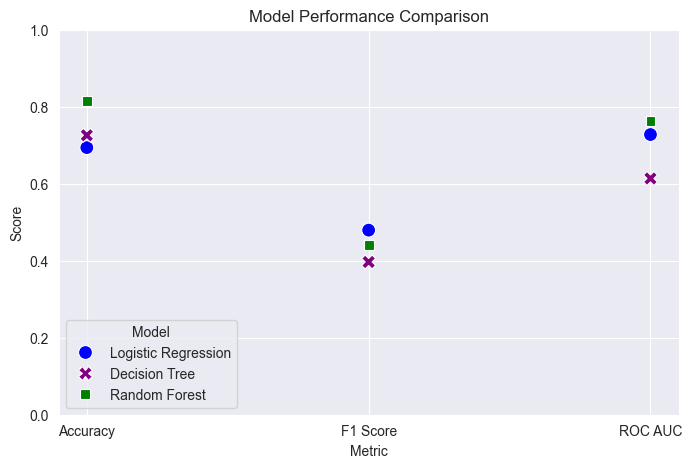

In [77]:
#Model Comparison  Visualization using scatter plot
import matplotlib.pyplot as plt
import seaborn as sns


# Preparing the  data
metrics = ['Accuracy', 'F1 Score', 'ROC AUC']
log_reg_scores = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred),roc_auc_score(y_test,y_prob)]
dt_scores =[accuracy_score(y_test,y_pred_dt),f1_score(y_test,y_pred_dt), roc_auc_score(y_test,y_pred_dt_prob)]
rf_scores = [accuracy_score(y_test,y_pred_rf),f1_score(y_test,y_pred_rf),roc_auc_score(y_test,y_proba_rf)]


# Creating a DataFrame
df_compare = pd.DataFrame({
    'Metric': metrics * 3,
    'Score': log_reg_scores +dt_scores + rf_scores,
    'Model': ['Logistic Regression'] * 3 + ['Decision Tree'] * 3 +['Random Forest'] * 3
})

# Plotting a scatterplot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_compare, x='Metric', y='Score', hue='Model', s=100, style='Model',palette=['blue','purple','green'])

plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


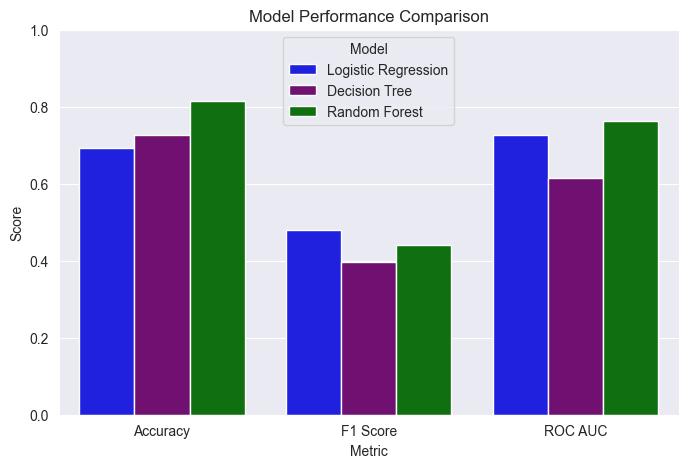

In [78]:
#BAR Plot for visualization for model comparison
plt.figure(figsize=(8,5))
sns.barplot(data=df_compare, x='Metric', y='Score', hue='Model',palette=['blue','purple','green'])
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()
